Was curious about the following in Shark Tank:-
*   Distribution of Cities from which Pitchers came
*   Distribution of different Industries that came for pitching
*   Gender distribution of Entrepreneurs
*   Top 10 Highest Yearly Revenue of the brands
*   Top 10 highest Gross Margin of different brands
*   How many accepted or rejected sharks offers?
*   Industry wise Investments By different sharks
*   No. of sharks in a deal
*   Total Amount Asked by the Pitchers
*   Total Amount Invested by the sharks
*   Amount Lent by the Sharks
*   PORTFOLIO OF EACH SHARK
*   Companies who got the same valuation as they requested
*   Pre-revenue Companies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_dark"
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[Kaggle Dataset Link](https://www.kaggle.com/datasets/thirumani/shark-tank-india?select=Shark+Tank+India.csv)
(It contains data of Season 1,2 and 3)

In [ ]:
shark_tank = pd.read_csv(r'/content/drive/MyDrive/csv xlsx_data_projects/Shark_Tank/archive.zip')
pd.set_option('display.max_columns', None) #To display all columns
shark_tank.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,Business Description,Company Website,Started in,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Pitchers Average Age,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,EBITDA,Cash Burn,SKUs,Has Patents,Bootstrapped,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of Sharks in Deal,Deal Has Conditions,Royalty Deal,Advisory Shares Equity,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Amit Present,Ashneer Present,Ghazal Present,Guest Present
0,1,BluePineFoods,1,1,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Food,Frozen Momos,https://bluepinefoods.com/,2016.0,3,2.0,1.0,NaN,0.0,Middle,Delhi,Delhi,95.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,1000.0,1,1.0,75.0,16.00,NaN,NaN,469.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.33,NaN,NaN,NaN,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
1,1,BoozScooters,1,2,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,2017.0,1,1.0,NaN,NaN,0.0,Young,Ahmedabad,Gujarat,4.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,15.0,267.0,1,1.0,40.0,50.00,NaN,NaN,80.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
2,1,HeartUpMySleeves,1,3,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,2021.0,1,NaN,1.0,NaN,0.0,Young,Delhi,Delhi,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,10.0,250.0,1,1.0,25.0,30.00,NaN,NaN,83.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,12.5,15.00,NaN,12.5,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,NaN,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2019.0,2,2.0,NaN,NaN,0.0,Middle,Bangalore,Karnataka,700.0,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1.0,7000.0,1,1.0,70.0,2.75,NaN,NaN,2545.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
4,1,HeadAndHeart,2,5,20-Dec-21,4-Feb-22,NaN,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Education,Brain Development Course,https://thehnh.in/,2015.0,4,1.0,3.0,NaN,1.0,Middle,Patiala,Punjab,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,1000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN


In [ ]:
shark_tank.shape

(396, 82)

In [ ]:
shark_tank.columns

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Episode Title',
       'Anchor', 'Industry', 'Business Description', 'Company Website',
       'Started in', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'EBITDA', 'Cash Burn', 'SKUs', 'Has Patents', 'Bootstrapped',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
       'Deal Valuation', 'Number of Sharks in Deal', 'Deal Has Conditions',
       'Royalty Deal', 'Advisory Shares Equity', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Vineeta

In [ ]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 82 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              396 non-null    int64  
 1   Startup Name               396 non-null    object 
 2   Episode Number             396 non-null    int64  
 3   Pitch Number               396 non-null    int64  
 4   Season Start               396 non-null    object 
 5   Season End                 321 non-null    object 
 6   Original Air Date          89 non-null     object 
 7   Episode Title              396 non-null    object 
 8   Anchor                     396 non-null    object 
 9   Industry                   396 non-null    object 
 10  Business Description       396 non-null    object 
 11  Company Website            387 non-null    object 
 12  Started in                 282 non-null    float64
 13  Number of Presenters       396 non-null    int64  

In [ ]:
shark_tank.describe()

,Season Number,Episode Number,Pitch Number,Started in,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,EBITDA,SKUs,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of Sharks in Deal,Royalty Deal,Advisory Shares Equity,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Amit Present,Ashneer Present,Ghazal Present,Guest Present
count,396.000000,396.000000,396.0000,282.000000,396.000000,344.000000,183.000000,3.0,392.000000,178.000000,189.000000,103.000000,55.000000,1.0,20.000000,396.000000,396.000000,396.000000,396.000000,272.000000,220.000000,220.000000,44.000000,29.000000,219.000000,220.000000,10.0,3.000000,73.000000,73.000000,13.000000,58.000000,58.000000,10.000000,61.000000,61.000000,5.000000,89.000000,89.000000,10.00000,83.000000,83.000000,11.000000,25.000000,25.000000,4.000000,21.000000,21.000000,2.00000,8.000000,8.000000,0.0,21.000000,21.000000,4.000000,325.0,257.0,348.0,341.0,277.0,104.0,99.0,27.0,59.000000
mean,1.805556,19.876263,198.5000,2018.712766,2.037879,1.703488,1.191257,1.0,0.176020,591.544944,71.838370,53.805825,21.418182,15.0,434.450000,155.037881,3.823712,5424.593459,0.686869,0.808824,67.802732,8.970455,45.704545,10.379310,2313.776643,2.009091,1.0,1.533333,31.746716,4.276145,40.396923,32.754483,4.572655,24.416000,31.029840,5.272262,24.500000,35.253259,3.302613,43.11600,34.763618,5.457602,31.090909,40.102800,5.053064,36.250000,25.682381,4.440000,57.00000,19.998782,6.462500,NaN,51.500000,2.676905,21.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.254237
std,0.732652,14.002616,114.4596,2.795353,0.827428,0.843006,0.421314,0.0,0.381324,1689.725733,272.486227,21.988436,12.102480,NaN,1339.127425,1505.118442,3.658622,9534.459866,0.464354,0.393953,44.564009,9.986421,27.136673,3.858329,3655.490888,1.126643,0.0,0.950438,19.619527,5.351964,22.126450,21.629367,4.946684,14.662481,22.576157,5.597896,15.041609,24.804649,4.700416,19.79874,30.544833,10.940380,15.332675,28.393118,5.321037,23.935678,16.860620,5.065662,59.39697,10.946848,5.326199,NaN,44.357356,3.148424,10.070584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.439169
min,1.000000,0.000000,1.0000,1998.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,3.000000,1.000000,15.0,2.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.500000,20.000000,0.000000,0.000000,1.000000,1.0,0.600000,0.000016,0.200000,12.500000,5.000000,0.300000,12.500000,0.000000,0.166000,12.500000,0.000000,0.166000,16.66000,0.000000,0.166000,10.000000,5.000000,0.330000,10.000000,1.000000,1.000000,15.00000,0.000253,1.000000,NaN,10.000000,0.300000,12.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
25%,1.000000,8.000000,99.7500,2018.000000,1.000000,1.000000,1.000000,1.0,0.000000,64.750000,5.000000,40.000000,12.000000,15.0,9.000000,50.000000,1.000000,1000.000000,0.000000,1.000000,40.000000,2.500000,25.000000,10.000000,400.000000,1.000000,1.0,1.050000,19.000000,1.000000,25.000000,18.245000,1.000000,13.125000,20.000000,1.330000,15.000000,18.750000,1.000000,31.12500,20.000000,1.000000,23.500000,18.750000,1.500000,21.250000,15.000000,2.000000,36.00000,14.995000,4.050000,NaN,25.000000,1.000000,14.375000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
50%,2.0000

In [ ]:
pd.set_option('display.max_rows', None)
shark_tank.isnull().sum()

Season Number                  0
Startup Name                   0
Episode Number                 0
Pitch Number                   0
Season Start                   0
Season End                    75
Original Air Date            307
Episode Title                  0
Anchor                         0
Industry                       0
Business Description           0
Company Website                9
Started in                   114
Number of Presenters           0
Male Presenters               52
Female Presenters            213
Transgender Presenters       393
Couple Presenters              4
Pitchers Average Age           0
Pitchers City                  1
Pitchers State                 1
Yearly Revenue               218
Monthly Sales                207
Gross Margin                 293
Net Margin                   341
EBITDA                       395
Cash Burn                    350
SKUs                         376
Has Patents                  363
Bootstrapped                 394
Original A

Not removing the null values because here the null values are not outliers, it plays a role in the dataset. Like for example, if Namita Debt amount is Nan that means she hasnt given loan to the pitchers and so on.

# **Correlation Matrix**

In [ ]:
shark_tank.corr(method = 'pearson').T.round(2).style.background_gradient(cmap='PuBu')

,Season Number,Episode Number,Pitch Number,Started in,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,EBITDA,SKUs,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of Sharks in Deal,Royalty Deal,Advisory Shares Equity,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Amit Present,Ashneer Present,Ghazal Present,Guest Present
Season Number,1.000000,0.040000,0.920000,0.220000,-0.070000,-0.010000,0.030000,nan,-0.060000,0.190000,0.210000,-0.010000,-0.190000,nan,-0.080000,-0.050000,-0.250000,0.110000,0.090000,0.090000,0.240000,-0.430000,0.050000,-0.010000,0.350000,-0.080000,nan,nan,0.090000,-0.240000,0.210000,0.470000,-0.500000,-0.240000,0.380000,-0.320000,0.240000,0.150000,-0.310000,0.270000,0.210000,-0.330000,0.480000,0.160000,-0.060000,nan,nan,nan,nan,nan,nan,nan,0.140000,0.120000,-0.200000,nan,nan,nan,nan,nan,nan,nan,nan,0.180000
Episode Number,0.040000,1.000000,0.290000,-0.030000,0.050000,0.080000,0.040000,nan,-0.030000,0.060000,0.020000,-0.000000,0.270000,nan,0.330000,-0.030000,-0.070000,0.050000,-0.010000,0.040000,-0.070000,-0.080000,-0.040000,0.210000,-0.020000,0.030000,nan,-0.990000,-0.080000,-0.030000,-0.290000,-0.090000,-0.250000,-0.180000,-0.110000,-0.130000,-0.730000,-0.010000,-0.130000,-0.440000,-0.060000,0.010000,0.190000,-0.170000,-0.250000,0.950000,-0.270000,-0.180000,1.000000,-0.420000,0.030000,nan,-0.210000,-0.160000,0.300000,nan,nan,nan,nan,nan,nan,nan,nan,0.040000
Pitch Number,0.920000,0.290000,1.000000,0.210000,-0.060000,-0.000000,-0.010000,nan,-0.060000,0.200000,0.210000,-0.020000,-0.120000,nan,-0.020000,-0.060000,-0.230000,0.100000,-0.010000,0.040000,0.200000,-0.440000,0.020000,0.140000,0.330000,-0.070000,nan,-1.000000,0.050000,-0.220000,-0.120000,0.420000,-0.570000,-0.300000,0.320000,-0.340000,0.000000,0.130000,-0.330000,0.030000,0.200000,-0.330000,0.460000,0.030000,-0.280000,0.950000,-0.260000,-0.160000,1.000000,0.100000,-0.260000,nan,-0.090000,-0.020000,0.140000,nan,nan,nan,nan,nan,nan,nan,nan,0.330000
Started in,0.220000,-0.030000,0.210000,1.000000,-0.060000,0.070000,0.040000,nan,-0.210000,-0.110000,-0.060000,0.380000,0.340000,nan,-0.410000,-0.110000,-0.110000,-0.070000,0.110000,0.140000,0.040000,-0.040000,-0.080000,0.080000,-0.050000,0.140000,nan,0.800000,-0.230000,-0.260000,-0.560000,-0.150000,-0.030000,0.330000,0.140000,0.060000,0.990000,-0.140000,-0.070000,0.020000,-0.280000,-0.150000,0.070000,-0.420000,-0.030000,-1.000000,0.150000,-0.330000,1.000000,-0.150000,0.090000,nan,0.400000,0.210000,0.080000,nan,nan,nan,nan,nan,nan,nan,nan,-0.020000
Number of Presenters,-0.070000,0.050000,-0.060000,-0.060000,1.000000,0.760000,0.290000,nan,0.150000,0.030000,-0.000000,-0.180000,0.070000,nan,0.010000,-0.060000,-0.140000,0.060000,0.060000,-0.050000,0.070000,-0.210000,0.280000,0.320000,0.120000,0.040000,nan,-0.880000,-0.010000,-0.090000,-0.250000,0.150000,-0.210000,-0.290000,0.120000,-0.270000,nan,0.110000,0.010000,0.270000,0.020000,-0.250000,0.500000,-0.250000,-0.080000,0.800000,-0.080000,-0.280000,nan,0.280000,-0.450000,nan,-0.050000,-0.090000,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.070000
Male Presenters,-0.010000,0.080000,-0.000000,0.070000,0.760000,1.000000,-0

In [ ]:
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")
print(shark_tank['Episode Number'].value_counts().sort_values(ascending=True).unique(), "Pitches came per episodes")

3 seasons 

51 episodes 

396 startup companies came for pitching 

[ 2  3  4  6  7  8  9 10 11 31] Pitches came per episodes


**Distribution of Cities from which Pitchers came**

In [ ]:
print(shark_tank['Pitchers City'].value_counts(), "\n")

Mumbai                       66
Delhi                        56
Bangalore                    43
Ahmedabad                    23
Pune                         22
Gurgaon                      17
Hyderabad                    14
Kolkata                      14
Jaipur                        9
Noida                         8
Surat                         8
Chennai                       6
Nagpur                        5
Goa                           4
Ludhiana                      4
Indore                        4
Gandhinagar                   3
Thane                         3
Coimbatore                    2
Vadodara                      2
Agra                          2
Srinagar                      2
Jammu                         2
Amaravati                     2
Chandigarh                    2
Lucknow                       2
Jalandhar                     2
Jhumri Telaiya,Raipur         1
Bangalore,Punganur            1
Delhi,Mumbai                  1
Dehradun,Nainital,Lucknow     1
Himmatna

Text(0.5, 1.0, 'Shark Tank India')

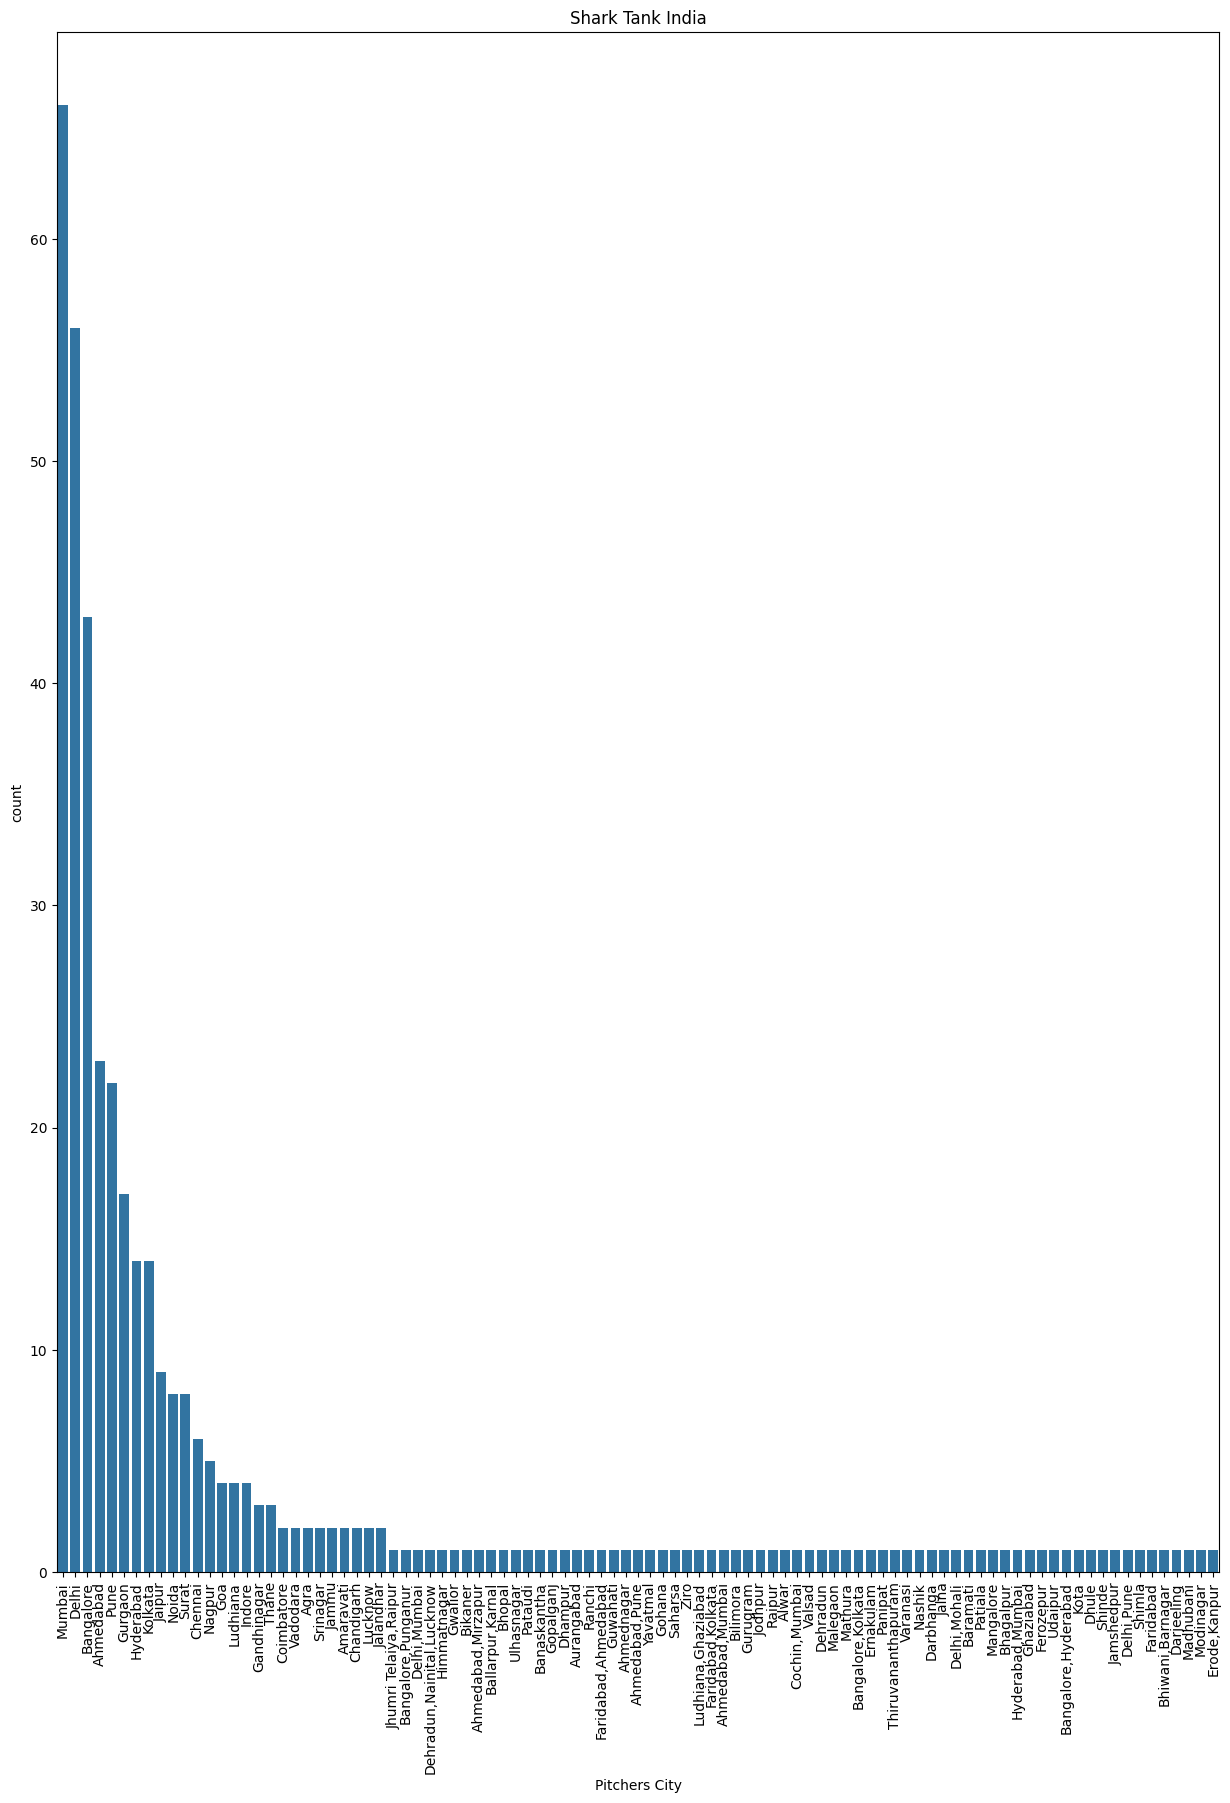

In [ ]:
fig = plt.figure(figsize=(15, 20))
ax = sns.countplot(x='Pitchers City', data=shark_tank, order=shark_tank['Pitchers City'].value_counts().index)
# Rotating the x-axis labels by 90 degrees
plt.xticks(rotation=90)
ax.set_title('Shark Tank India')

2019.0    54
2020.0    47
2021.0    45
2018.0    40
2017.0    30
2016.0    21
2022.0    20
2023.0     6
2015.0     5
2014.0     4
2012.0     3
2013.0     2
2010.0     2
2005.0     1
1998.0     1
2006.0     1
Name: Started in, dtype: int64 



Text(0.5, 1.0, 'Shark Tank India')

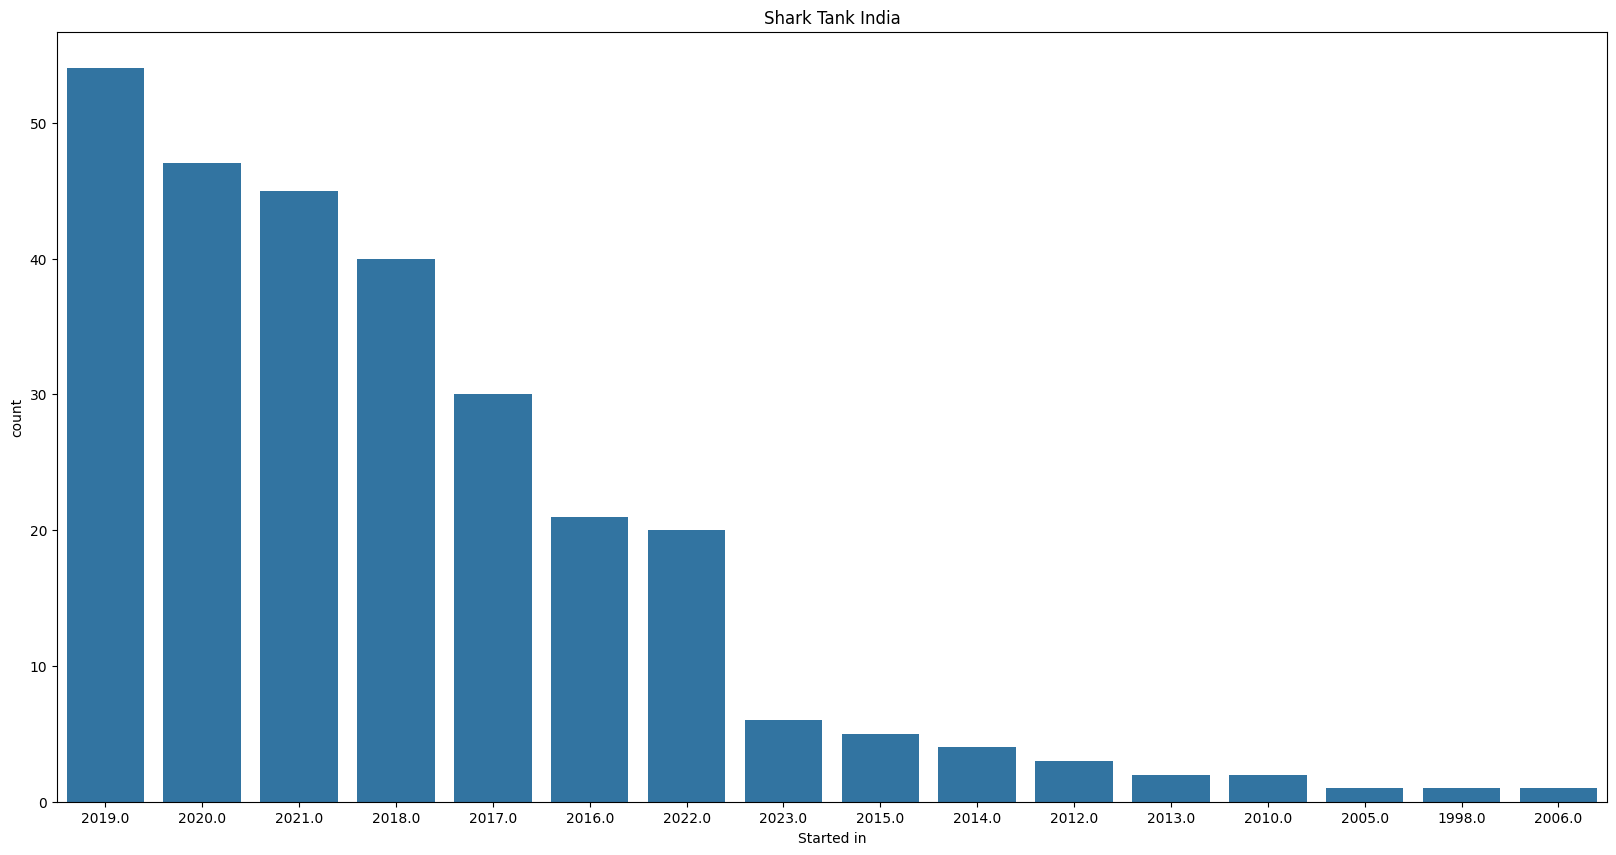

In [ ]:
print(shark_tank['Started in'].value_counts(), "\n")
fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Started in', data=shark_tank, order=shark_tank['Started in'].value_counts().index)
ax.set_title('Shark Tank India')

Text(0.5, 1.0, 'Shark Tank India')

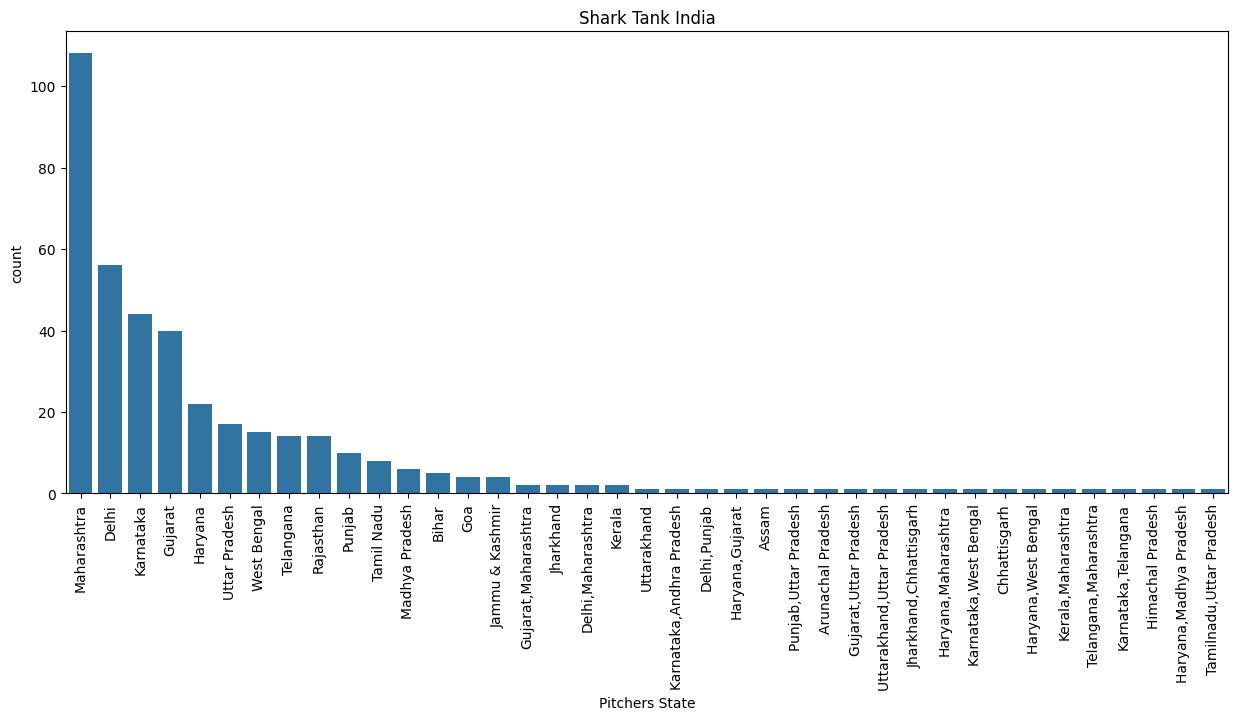

In [ ]:
fig = plt.figure(figsize=(15, 6))
# Rotating the x-axis labels by 90 degrees
plt.xticks(rotation=90)
ax = sns.countplot(x='Pitchers State', data=shark_tank, order=shark_tank['Pitchers State'].value_counts().index)
ax.set_title('Shark Tank India')

In [ ]:
print(shark_tank['Pitchers State'].value_counts(), "\n")

Maharashtra                  108
Delhi                         56
Karnataka                     44
Gujarat                       40
Haryana                       22
Uttar Pradesh                 17
West Bengal                   15
Telangana                     14
Rajasthan                     14
Punjab                        10
Tamil Nadu                     8
Madhya Pradesh                 6
Bihar                          5
Goa                            4
Jammu & Kashmir                4
Gujarat,Maharashtra            2
Jharkhand                      2
Delhi,Maharashtra              2
Kerala                         2
Uttarakhand                    1
Karnataka,Andhra Pradesh       1
Delhi,Punjab                   1
Haryana,Gujarat                1
Assam                          1
Punjab,Uttar Pradesh           1
Arunachal Pradesh              1
Gujarat,Uttar Pradesh          1
Uttarakhand,Uttar Pradesh      1
Jharkhand,Chhattisgarh         1
Haryana,Maharashtra            1
Karnataka,

**Distribution of different Industries that came for pitching**

In [ ]:
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Different Industries came in Shark Tank India </b>", color = 'Industry',template='simple_white', text=tmp)
fig.show()

Food                            95
Beauty/Fashion                  80
Manufacturing                   43
Technology/Software             38
Services                        31
Medical/Health                  29
Furnishing/Household            17
Vehicles/Electrical Vehicles    15
Liquor/Beverages                11
Sports                          10
Education                        9
Animal/Pets                      6
Electronics                      5
Agriculture                      3
Hardware                         2
Entertainment                    2
Name: Industry, dtype: int64


**Gender Wise Entrepreneurs**

In [ ]:
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total Male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "% (data incomplete)\n", sep='')

Total pitchers - 807 

Total Male pitchers - 586 

Total female pitchers - 218 

Male entrepreneurs percentage - 72.61%

Female entrepreneurs percentage - 27.01%

Couple entrepreneurs percentage - 8.55% (data incomplete)



**Top 10 Highest Yearly Revenue of the brands**

In [ ]:
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", title="Highest Revenue of the pitches", text=tmpdf['Yearly Revenue'].map(int).map(str) + "%")
fig.show()

Startup Name
Refit                18700.0
FrenchCrown           7200.0
NasherMiles           5700.0
Rubans                5100.0
YesMadam              5000.0
Toyshine              4500.0
Zorko                 3000.0
UrbanMonkey           2500.0
GunjanAppsStudios     2400.0
AdilQadri             2070.0
Name: Yearly Revenue, dtype: float64


**Top 10 highest Gross Margin of different brands**

In [ ]:
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", title="Highest Gross margin of the brands", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
UnStop                 90.0
EvaScalp               85.0
MidNightAngelsByPC     83.0
Auli                   80.0
KabaddiAdda            80.0
LeafyAffair            80.0
Pflow                  80.0
Name: Gross Margin, dtype: float64


**How many accepted or rejected sharks offers?**

1    69%
0    31%
Name: Received Offer, dtype: object 



<Axes: xlabel='Received Offer', ylabel='count'>

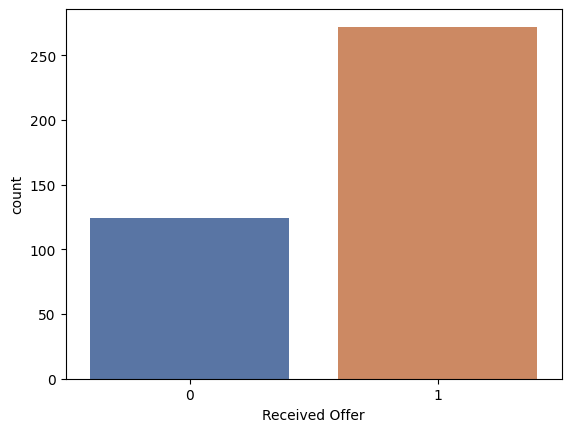

In [ ]:
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=shark_tank, palette='deep')

1.0    81%
0.0    19%
Name: Accepted Offer, dtype: object 



<Axes: xlabel='Accepted Offer', ylabel='count'>

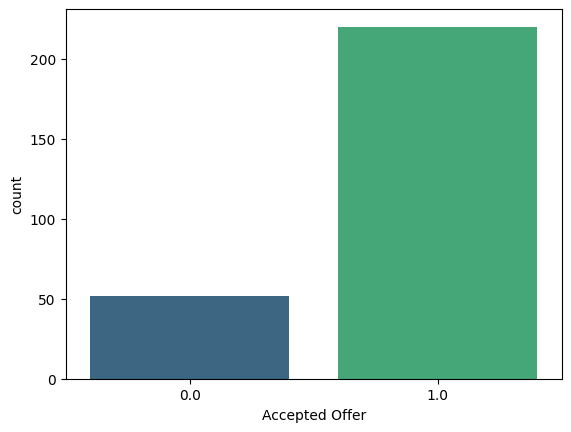

In [ ]:
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

**Startup Companies who rejected sharks offer**

In [ ]:
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Original Ask Amount"]]

,Startup Name,Original Ask Amount
6,qZenseLabs,100.0
19,Torch-it,75.0
21,LaKheerDeli,50.0
27,KabiraHandmad,100.0
41,MorrikoPureFoods,100.0
55,IndiaHempandCo,50.0
60,KetoIndia,150.0
70,Moonshine,80.0
71,Falhari,50.0
73,UrbanMonkey,100.0


**Industry wise Investments By different sharks**

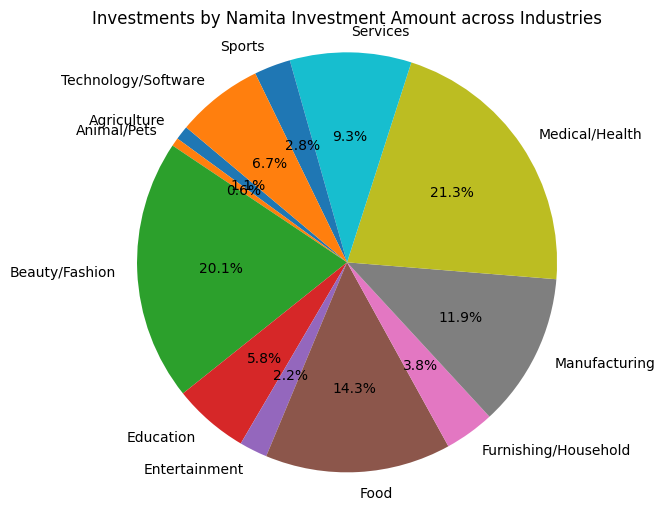

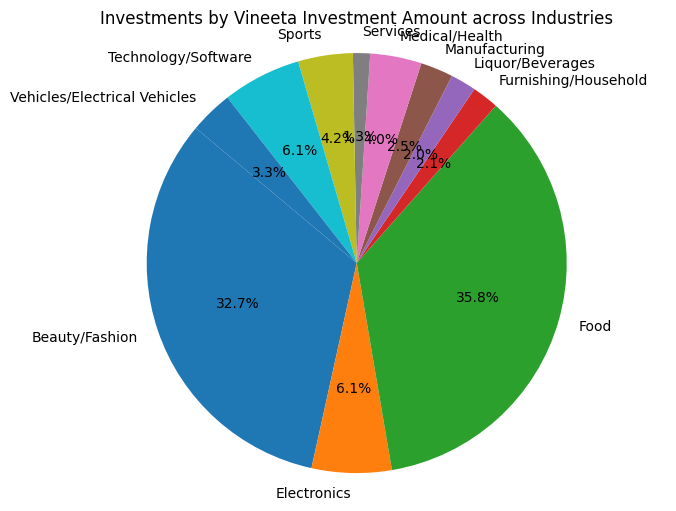

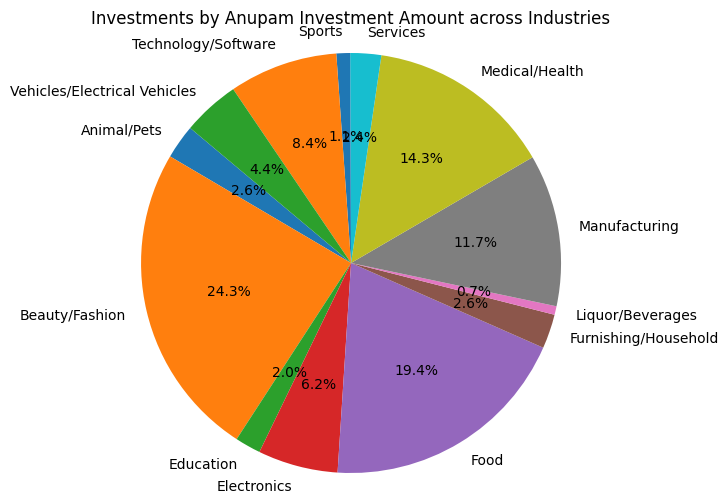

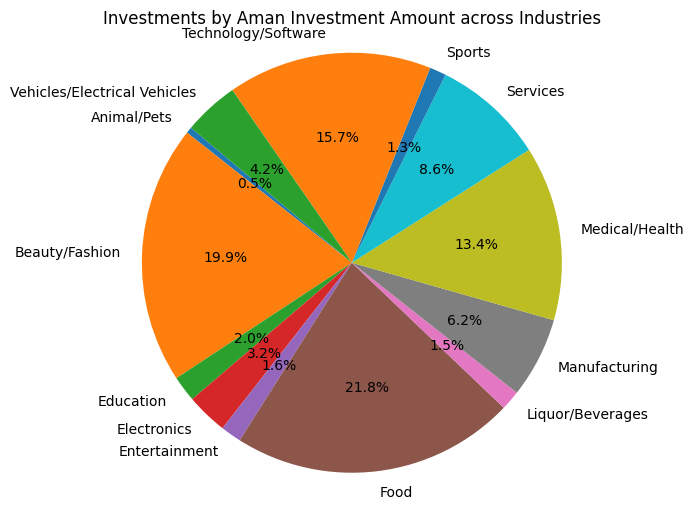

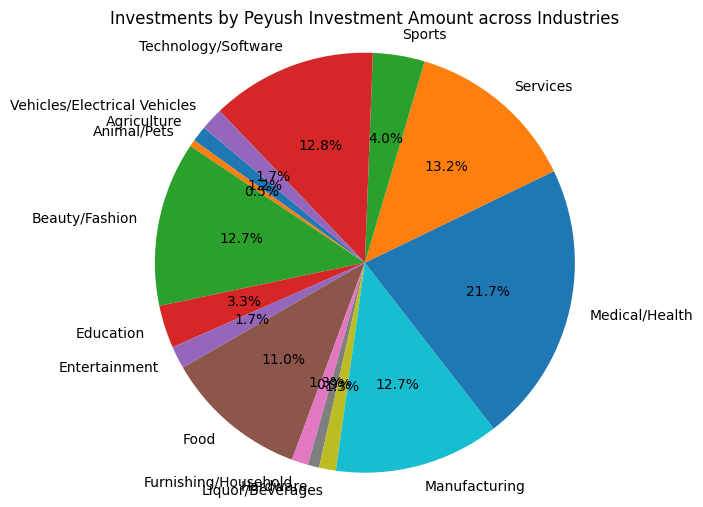

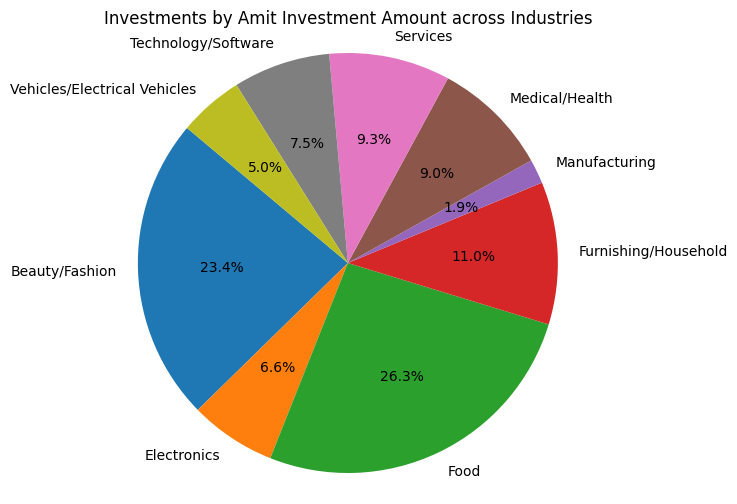

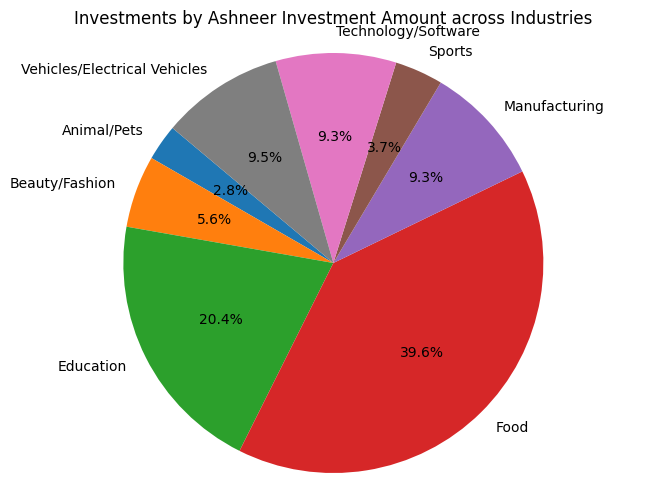

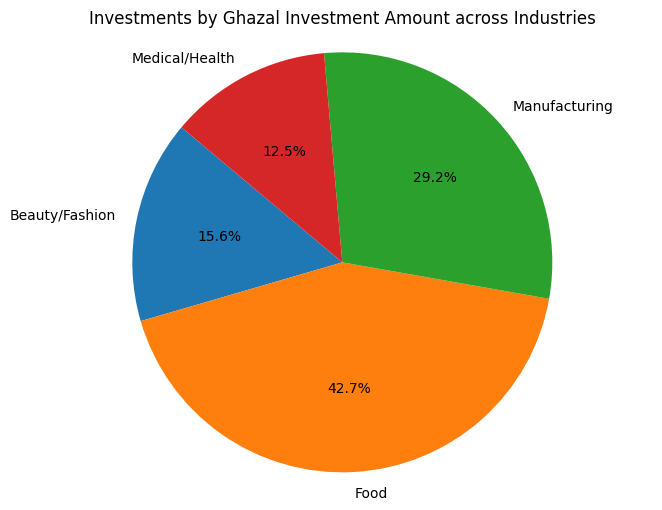

In [ ]:
# Selecting the shark columns
shark_columns = ['Namita Investment Amount', 'Vineeta Investment Amount', 'Anupam Investment Amount',
                 'Aman Investment Amount', 'Peyush Investment Amount', 'Amit Investment Amount',
                 'Ashneer Investment Amount', 'Ghazal Investment Amount']

# Loop through each shark
for shark in shark_columns:
    # Grouping by 'Industry' and summing the investment amounts for the current shark
    shark_investments = shark_tank.groupby('Industry')[shark].sum().dropna()

    # Filter sectors with investment amounts greater than zero
    shark_investments = shark_investments[shark_investments > 0]

    # Plotting a pie chart only if there are sectors with investment amounts greater than zero
    if not shark_investments.empty:
        plt.figure(figsize=(8, 6))
        plt.pie(shark_investments, labels=shark_investments.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Investments by {shark} across Industries')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print(f"No sectors with investment amounts greater than zero for {shark}")

**No. of sharks in a deal**

1.0    42%
2.0    32%
3.0    15%
4.0     7%
5.0     5%
Name: Number of Sharks in Deal, dtype: object
The deals where more than or equals to 5 sharks are involved
           Startup Name  Total Deal Amount  Total Deal Equity
15        SkippiIcePops              100.0               15.0
50   FindYourKicksIndia               50.0               25.0
64               INACAN              100.0               10.0
80   SunfoxTechnologies              100.0                6.0
209              Snitch              150.0                1.5
239            Mahantam               30.0               20.0
274         Pharmallama              200.0                5.0
311           Sahayatha              100.0               10.0
357            JewelBox              200.0                6.0
365         NasherMiles              300.0                1.5


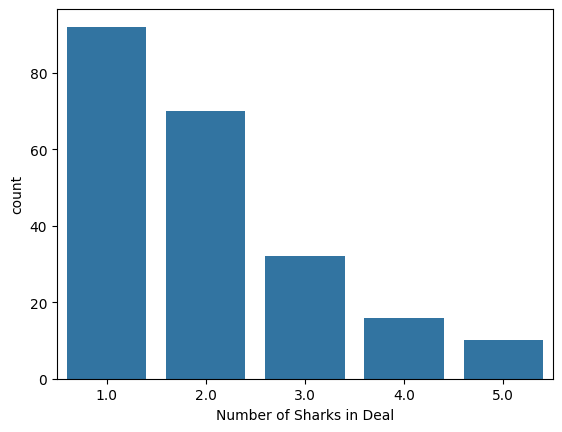

In [ ]:
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
print('The deals where more than or equals to 5 sharks are involved')
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

**Total Amount Asked by the Pitchers**

In [ ]:
print(format_currency(shark_tank['Original Ask Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹613.95 crores


**Total Amount Invested by the sharks**

In [ ]:
print(format_currency(shark_tank['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹149.17 crores


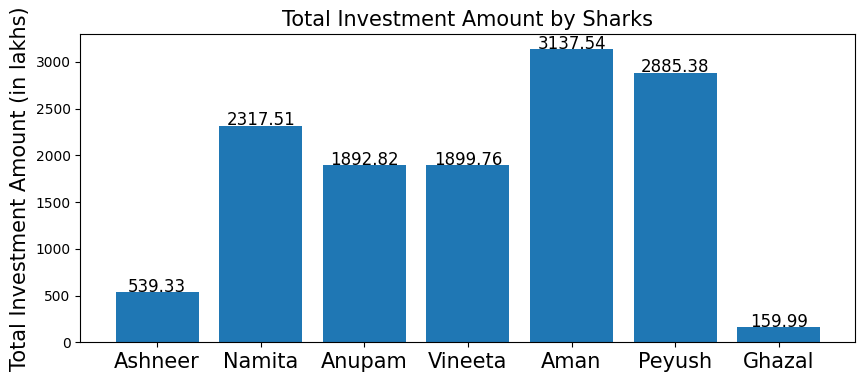

In [ ]:
Amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Ghazal Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=15)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()

**Amount Lent by the Sharks**

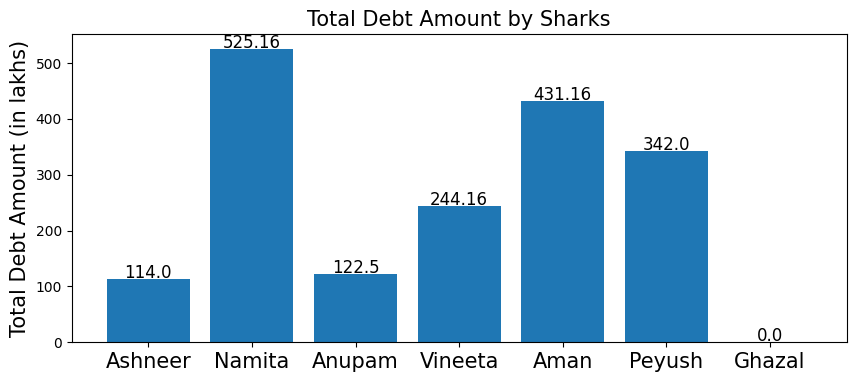

In [ ]:
Amount = [shark_tank['Ashneer Debt Amount'].sum(), shark_tank['Namita Debt Amount'].sum(), shark_tank['Anupam Debt Amount'].sum(), shark_tank['Vineeta Debt Amount'].sum(),
    shark_tank['Aman Debt Amount'].sum(), shark_tank['Peyush Debt Amount'].sum(), shark_tank['Ghazal Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Debt Amount (in lakhs)",fontsize=15)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Debt Amount by Sharks", fontsize=15)
plt.show()

**PORTFOLIO OF EACH SHARK**

In [ ]:
print("Peyush Bansal's total investments", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].reset_index()

Peyush Bansal's total investments 82
Investment amount by Peyush 28.85 crores

Equity received by Peyush 452.98 % in different companies

Debt/loan amount by Peyush 3.42 crores

--------------------------------------------------------------------------------


,index,Startup Name,Industry,Peyush Investment Amount
0,23,VivalyfInnovations,Medical/Health,28.000000
1,26,Ariro,Manufacturing,25.000000
2,28,Nuutjob,Beauty/Fashion,8.330000
3,29,Meatyour,Food,10.000000
4,30,EventBeep,Education,10.000000
5,36,LOKA,Technology/Software,13.330000
6,37,Annie,Education,35.000000
7,38,Carragreen,Manufacturing,25.000000
8,39,TheYarnBazaar,Manufacturing,25.000000
9,44,PNTRobotics,Technology/Software,25.000000


In [ ]:
print("Aman Gupta's total investments", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].reset_index()

Aman Gupta's total investments 88
Investment amount by Aman 31.38 crores

Equity received by Aman 293.93 % in different companies

Debt/loan amount by Aman 4.31 crores

--------------------------------------------------------------------------------


,index,Startup Name,Industry,Aman Investment Amount
0,0,BluePineFoods,Food,25.000000
1,7,Peeschute,Beauty/Fashion,75.000000
2,11,Bummer,Beauty/Fashion,37.500000
3,12,RevampMoto,Vehicles/Electrical Vehicles,50.000000
4,15,SkippiIcePops,Food,20.000000
5,18,RaisingSuperstars,Education,50.000000
6,20,Kavach,Education,2.500000
7,22,BeyondSnack,Food,25.000000
8,25,Altor,Manufacturing,25.000000
9,26,Ariro,Manufacturing,25.000000


In [ ]:
print("Ghazal Alagh's total investments", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]]

Ghazal Alagh's total investments  8
Investment amount by Ghazal 1.6 crores

Equity received by Ghazal 51.7 % in different companies

Debt/loan amount by Ghazal 0.0 crores

--------------------------------------------------------------------------------


,Startup Name,Industry,Ghazal Investment Amount
76,TheSassBar,Beauty/Fashion,25.000000
80,SunfoxTechnologies,Medical/Health,20.000000
86,WattTechnovations,Medical/Health,0.000253
89,HumpyA2,Food,33.330000
91,GoldSafeSolutions,Manufacturing,16.660000
92,WakaoFoods,Food,25.000000
111,NomadFoodProject,Food,10.000000
122,WitBlox,Manufacturing,30.000000


In [ ]:
print("Ashneer Grover's total investments", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]]

Ashneer Grover's total investments 21
Investment amount by Ashneer 5.39 crores

Equity received by Ashneer 93.24 % in different companies

Debt/loan amount by Ashneer 1.14 crores

--------------------------------------------------------------------------------


,Startup Name,Industry,Ashneer Investment Amount
0,BluePineFoods,Food,25.00
1,BoozScooters,Vehicles/Electrical Vehicles,20.00
3,TagzFoods,Food,70.00
15,SkippiIcePops,Food,20.00
18,RaisingSuperstars,Education,50.00
22,BeyondSnack,Food,25.00
24,MotionBreeze,Vehicles/Electrical Vehicles,30.00
30,EventBeep,Education,10.00
39,TheYarnBazaar,Manufacturing,25.00
46,BambooIndia,Manufacturing,25.00


In [ ]:
print("Namita Thapar's Total Investments", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]]

Namita Thapar's Total Investments 73
Investment amount by Namita 23.18 crores

Equity received by Namita 312.16 % in different companies

Debt/loan amount by Namita 5.25 crores

--------------------------------------------------------------------------------


,Startup Name,Industry,Namita Investment Amount
10,JhaJiAchaar,Food,28.300000
11,Bummer,Beauty/Fashion,37.500000
15,SkippiIcePops,Food,20.000000
16,Menstrupedia,Education,50.000000
25,Altor,Manufacturing,25.000000
28,Nuutjob,Beauty/Fashion,8.330000
33,Farda,Beauty/Fashion,15.000000
34,Auli,Beauty/Fashion,75.000000
37,Annie,Education,35.000000
40,TheRenalProject,Medical/Health,50.000000


In [ ]:
print("Anupam Mittal's total investments", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]]

Anupam Mittal's total investments 60
Investment amount by Anupam 18.93 crores

Equity received by Anupam 321.61 % in different companies

Debt/loan amount by Anupam 1.23 crores

--------------------------------------------------------------------------------


,Startup Name,Industry,Anupam Investment Amount
2,HeartUpMySleeves,Beauty/Fashion,12.500000
9,CosIQ,Beauty/Fashion,25.000000
12,RevampMoto,Vehicles/Electrical Vehicles,50.000000
15,SkippiIcePops,Food,20.000000
20,Kavach,Education,2.500000
23,VivalyfInnovations,Medical/Health,28.000000
29,Meatyour,Food,10.000000
32,ARRCOATSurfaceTextures,Manufacturing,50.000000
36,LOKA,Technology/Software,13.330000
37,Annie,Education,35.000000


In [ ]:
print("Vineeta Singh's total investments", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]]

Vineeta Singh's total investments 58
Investment amount by Vineeta 19.0 crores

Equity received by Vineeta 265.21 % in different companies

Debt/loan amount by Vineeta 2.44 crores

--------------------------------------------------------------------------------


,Startup Name,Industry,Vineeta Investment Amount
0,BluePineFoods,Food,25.00
1,BoozScooters,Vehicles/Electrical Vehicles,20.00
2,HeartUpMySleeves,Beauty/Fashion,12.50
8,NOCD,Food,20.00
9,CosIQ,Beauty/Fashion,25.00
10,JhaJiAchaar,Food,28.30
15,SkippiIcePops,Food,20.00
65,Get-A-Whey,Food,33.33
67,TheQuirkyNaari,Beauty/Fashion,17.50
80,SunfoxTechnologies,Medical/Health,20.00


**Companies who got the same valuation as they requested**

In [ ]:
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

,Startup Name,Valuation Requested,Deal Valuation
20,Kavach,50.0,50.0
22,BeyondSnack,2000.0,2000.0
45,Cocofit,0.0,0.0
86,WattTechnovations,0.0,0.0
171,TheSimplySalad,300.0,300.0
185,Janitri,4000.0,4000.0
203,NeoMotion,10000.0,10000.0
219,PadCare,2500.0,2500.0
223,Geeani,1000.0,1000.0
240,MindPeers,5300.0,5300.0


**Pre-revenue Companies**

In [ ]:
shark_tank.loc[shark_tank['Yearly Revenue'] == 0][['Startup Name','Industry']]

,Startup Name,Industry
9,CosIQ,Beauty/Fashion
23,VivalyfInnovations,Medical/Health
24,MotionBreeze,Vehicles/Electrical Vehicles
42,GoodGoodPiggy,Technology/Software
77,KGAgrotech,Agriculture
83,JulaaAutomation,Manufacturing
98,Scholify,Education
100,Sabjikothi,Manufacturing
114,On2Cook,Food
131,Scintiglo,Medical/Health
